# Exercise Sheet 5
## Rotated MNIST - Machine Learning in Fundamental Physics
The aim of this exercise is to write your custom layer with weight sharing as discussed for the group convolutional example in the lecture.

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist #to import our dataset
from tensorflow.keras.models import Sequential, Model # imports our type of network
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, Concatenate, Lambda # imports our layers we want to use

from tensorflow.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.utils import to_categorical #some function for data preparation

from scipy.ndimage import rotate

tf.compat.v1.disable_eager_execution()

1) Write a function which rotates images by a multiply of 90 degrees. Test your function on MNIST.

In [2]:
def rotate_img(img, angle):
    '''rotates img-array'''
    return rotate(img, angle)

def rotate_tensor(tensor):
    '''rotates tensor by 90 degrees'''
    tensor = tf.einsum('ijlm->jilm', tensor)
    tensor = tf.reverse(tensor,[-4])
    return tensor

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


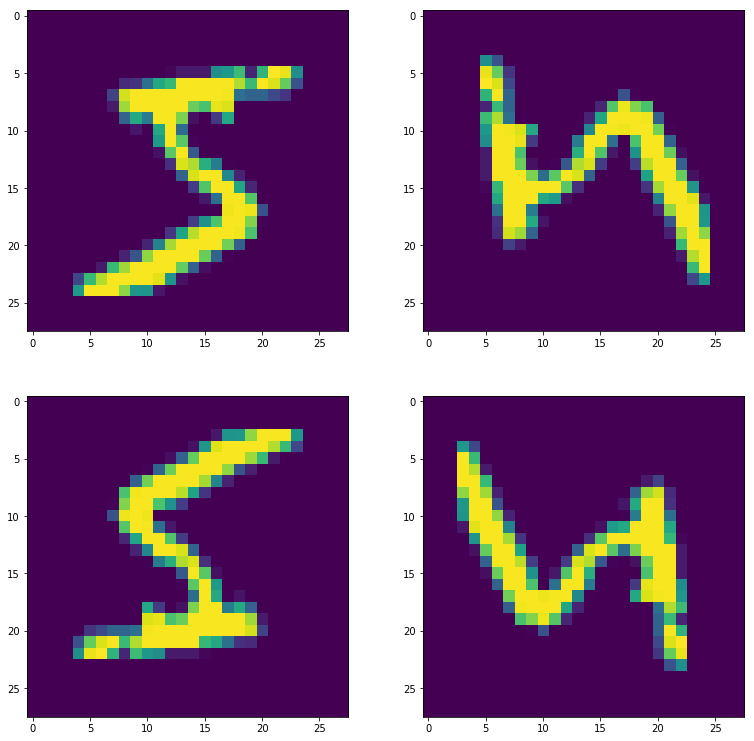

In [4]:
example = x_train[0]
fig, axes = plt.subplots(2, 2, figsize=(13, 13))
for ax in axes.flatten():
    ax.imshow(example)
    example = rotate(example, 90)

2) Generate a dataset of rotated MNIST digits using this function. Ensure that the classes in your dataset are balanced.

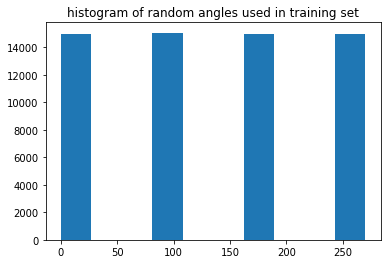

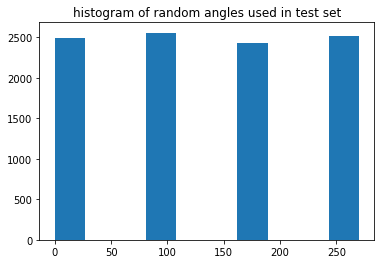

In [5]:
# create arrays of rotation angles
angles_train = np.random.randint(0, 4, size = x_train.shape[0])*90
angles_test = np.random.randint(0, 4, size = x_test.shape[0])*90

# create rotated test set
x_train_rot = [rotate_img(x_train[ind], angle) for ind, angle in enumerate(angles_train)]
x_train_rot = x_train.reshape(len(x_train_rot), 28, 28, 1)
x_test_rot = [rotate_img(x_test[ind], angle) for ind, angle in enumerate(angles_test)]
x_test_rot = x_test.reshape(len(x_test_rot), 28, 28, 1)

# check balance
plt.hist(angles_train)
plt.title('histogram of random angles used in training set')
plt.show()
plt.title('histogram of random angles used in test set')
plt.hist(angles_test)
plt.show()

3) Generate two benchmarks with one hidden dense layer with 100 and 400 hidden units (ReLu activation). Note: This question was ambigious and clarified to mean the following networks.

In [6]:
# Network with 100 Filters in Conv2D
inputs = Input(shape=x_train_rot.shape[1:])
x = Conv2D(100,(28,28),padding='valid',use_bias=False, activation='relu')(inputs)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
m_100 = Model(inputs, outputs=x)
m_100.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
m_100.summary()

W1031 20:03:24.152960 26864 deprecation.py:506] From C:\Users\Yanik\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 100)         78400     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 89,510
Trainable params: 89,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Netowrk with 400 Filters in Conv2D
inputs = Input(shape=x_train_rot.shape[1:])
x = Conv2D(400,(28,28),padding='valid',use_bias=False, activation='relu')(inputs)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
m_400 = Model(inputs, outputs=x)
m_400.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
m_400.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 400)         313600    
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 354,710
Trainable params: 354,710
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs = 20
batch_size = 128

history2 = m_100.fit(x_train_rot, y_train, batch_size=batch_size,
          epochs=epochs, verbose=1,
          validation_data=(x_test_rot, y_test))

history3 = m_400.fit(x_train_rot, y_train, batch_size=batch_size,
          epochs=epochs, verbose=1,
          validation_data=(x_test_rot, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3595 - accuracy: 0.9015 - val_loss: 0.1908 - val_accuracy: 0.9457
Epoch 2/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1647 - accuracy: 0.9518 - val_loss: 0.1359 - val_accuracy: 0.9580
Epoch 3/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1177 - accuracy: 0.9654 - val_loss: 0.1130 - val_accuracy: 0.9649
Epoch 4/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0.0988 - val_accuracy: 0.9694
Epoch 5/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0743 - accuracy: 0.9777 - val_loss: 0.0918 - val_accuracy: 0.9709
Epoch 6/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0818 - val_accuracy: 0.9749
Epoch 7/20
60000/60000 [==============================] 

4) Write a custom layer which implements the group convolutional example where 4 rotated filters are the output, i.e.~the weights among the filters are shared appropriately. Verify that your layer is performing the matrix multiplication you intended to design. 

In [9]:
# rotate and share weights
class Rotated_Conv2D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides=(1, 1), padding='valid', activation=None, use_bias=False):
        # pass everything in that is needed for Conv2D
        super(Rotated_Conv2D, self).__init__()
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.activation = activation
        self.use_bias = use_bias
        
    def build(self, input_shape):
        self.conv = tf.keras.layers.Conv2D(self.filters, self.kernel_size, 
                                           strides=self.strides, padding=self.padding,
                                           activation=self.activation, use_bias=self.use_bias)

    def call(self, inputs):
        # we want to return a stack of outputs, each with rotated weights
        x1 = self.conv(inputs)
        w1 = self.conv.get_weights()[0]
        w2 = rotate_tensor(w1)
        w3 = rotate_tensor(w2)
        w4 = rotate_tensor(w3)
        x2 = tf.nn.conv2d(inputs, w2, self.strides, 'VALID')
        x3 = tf.nn.conv2d(inputs, w3, self.strides, 'VALID')
        x4 = tf.nn.conv2d(inputs, w4, self.strides, 'VALID')
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3
        self.w4 = w4
        return tf.stack([x1, x2, x3, x4],axis=-1)

In [10]:
# Test matrix multiplication
examples = np.array([rotate(example, angle) for angle in range(0, 360, 90)])
examples = examples[..., None]
inputs = Input(shape=x_train_rot.shape[1:])
x = Rotated_Conv2D(1,(28,28),padding='valid', activation='relu')(inputs)
x = Flatten()(x)
m_test = Model(inputs, outputs=x)
m_test.summary()
m_test.predict(examples)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
rotated__conv2d (Rotated_Con (None, 1, 1, 1, 4)        784       
_________________________________________________________________
flatten_2 (Flatten)          (None, 4)                 0         
Total params: 784
Trainable params: 784
Non-trainable params: 0
_________________________________________________________________


array([[ 0.0801575 , -0.2673182 ,  0.23615636, -0.3914149 ],
       [ 0.        ,  0.08015745, -0.26731825,  0.23615636],
       [ 0.2361564 , -0.39141494,  0.0801574 , -0.26731822],
       [ 0.        ,  0.2361565 , -0.3914149 ,  0.08015739]],
      dtype=float32)

Looks good.

5) Use this layer to generate a second benchmark using the same number of weights for the hiddenlayer as in the benchmark with 100 hidden units

In [11]:
# Use custom Layer
inputs = Input(shape=x_train_rot.shape[1:])
rotated = Rotated_Conv2D(100,(28,28), padding='valid', activation='relu')
x = rotated(inputs)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
m_rot = Model(inputs, outputs=x)
m_rot.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
m_rot.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
rotated__conv2d_1 (Rotated_C (None, 1, 1, 100, 4)      78400     
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 119,510
Trainable params: 119,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs = 20
batch_size = 128

history = m_rot.fit(x_train_rot, y_train, batch_size=batch_size,
          epochs=epochs, verbose=1,
          validation_data=(x_test_rot, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3757 - accuracy: 0.8954 - val_loss: 0.1921 - val_accuracy: 0.9434
Epoch 2/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1669 - accuracy: 0.9517 - val_loss: 0.1414 - val_accuracy: 0.9598
Epoch 3/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1176 - accuracy: 0.9653 - val_loss: 0.1083 - val_accuracy: 0.9671
Epoch 4/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0903 - accuracy: 0.9725 - val_loss: 0.0899 - val_accuracy: 0.9726
Epoch 5/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0799 - val_accuracy: 0.9776
Epoch 6/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0896 - val_accuracy: 0.9720
Epoch 7/20
60000/60000 [==============================] 

6) Compare the performance and training between the three benchmark models.

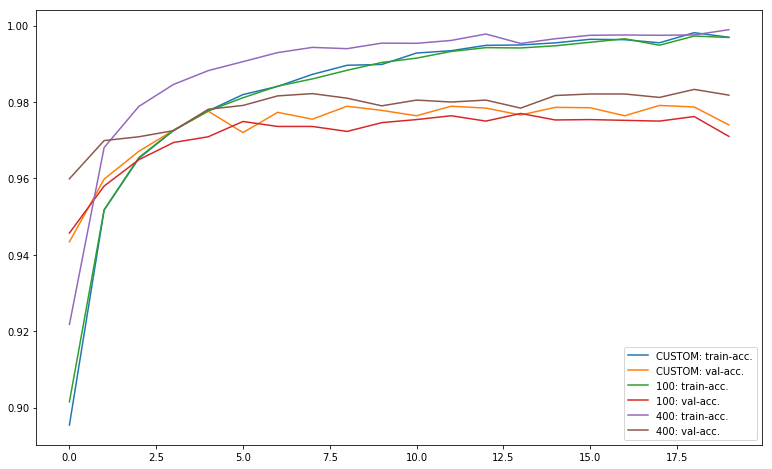

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
ax.plot(history.history['accuracy'], label='CUSTOM: train-acc.')
ax.plot(history.history['val_accuracy'], label='CUSTOM: val-acc.')
ax.plot(history2.history['accuracy'], label='100: train-acc.')
ax.plot(history2.history['val_accuracy'], label='100: val-acc.')
ax.plot(history3.history['accuracy'], label='400: train-acc.')
ax.plot(history3.history['val_accuracy'], label='400: val-acc.')
ax.legend()